In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit

In [7]:
#Data
r0 = [0, 2, 2, 1, 2, 0, 1, 1, 1, 2, 4, 4, 2, 1, 7, 4, 3, 5, 3, 2, 4, 1, 4, 5, 2,
 7, 5, 8, 2, 3, 5, 4, 1, 6, 5, 11, 5, 2, 5, 8, 5, 6, 6, 10, 7, 5, 5, 2, 8,
 1, 13, 9, 11, 9, 4, 4, 8, 6, 8, 6, 8, 14, 6, 5, 5, 2, 4, 2, 9, 5, 6, 7, 5,
 10, 3, 2, 1, 7, 9, 13, 9, 11, 4, 8, 2, 3, 7, 4, 7, 5, 6, 6, 5, 6, 9, 7, 7,
 7, 4, 2, 3, 4, 10, 3, 4, 2, 10, 5, 4, 5, 4, 6, 5, 3, 2, 2, 4, 6, 4, 1]

r1 = [3, 5, 2, 7, 7, 2, 5, 3, 5, 11, 6, 6, 11, 4, 4, 2, 8, 8, 6, 5, 15, 4, 9, 9,
 4, 12, 8, 8, 6, 8, 12, 4, 7, 16, 12, 9, 4, 7, 8, 11, 5, 12, 8, 17, 9, 3, 2,
 7, 6, 5, 11, 14, 13, 8, 6, 4, 8, 4, 8, 7, 15, 15, 9, 9, 5, 6, 3, 9, 12, 14,
 16, 17, 8, 8, 9, 5, 9, 11, 6, 14, 21, 16, 6, 9, 8, 9, 8, 4, 11, 11, 6, 9,
 4, 4, 9, 9, 10, 14, 6, 3, 4, 6, 10, 4, 3, 3, 10, 4, 10, 5, 4, 3, 13, 1, 7,
 5, 7, 6, 3, 7]

n0 = [28, 21, 32, 35, 35, 38, 30, 43, 49, 53, 31, 35, 46, 53, 61, 40, 29, 44, 52,
 55, 61, 31, 48, 44, 42, 53, 56, 71, 43, 43, 43, 40, 44, 70, 75, 71, 37, 31,
 42, 46, 47, 55, 63, 91, 43, 39, 35, 32, 53, 49, 75, 64, 69, 64, 49, 29, 40,
 27, 48, 43, 61, 77, 55, 60, 46, 28, 33, 32, 46, 57, 56, 78, 58, 52, 31, 28,
 46, 42, 45, 63, 71, 69, 43, 50, 31, 34, 54, 46, 58, 62, 52, 41, 34, 52, 63,
 59, 88, 62, 47, 53, 57, 74, 68, 61, 45, 45, 62, 73, 53, 39, 45, 51, 55, 41,
 53, 51, 42, 46, 54, 32]

n1 = [28, 21, 32, 35, 35, 38, 30, 43, 49, 53, 31, 35, 46, 53, 61, 40, 29, 44, 52,
 55, 61, 31, 48, 44, 42, 53, 56, 71, 43, 43, 43, 40, 44, 70, 75, 71, 37, 31,
 42, 46, 47, 55, 63, 91, 43, 39, 35, 32, 53, 49, 75, 64, 69, 64, 49, 29, 40,
 27, 48, 43, 61, 77, 55, 60, 46, 28, 33, 32, 46, 57, 56, 78, 58, 52, 31, 28,
 46, 42, 45, 63, 71, 69, 43, 50, 31, 34, 54, 46, 58, 62, 52, 41, 34, 52, 63,
 59, 88, 62, 47, 53, 57, 74, 68, 61, 45, 45, 62, 73, 53, 39, 45, 51, 55, 41,
 53, 51, 42, 46, 54, 32]

year = [-10, -9, -9, -8, -8, -8, -7, -7, -7, -7, -6, -6, -6, -6, -6, -5, -5, -5,
 -5, -5, -5, -4, -4, -4, -4, -4, -4, -4, -3, -3, -3, -3, -3, -3, -3, -3, -2,
 -2, -2, -2, -2, -2, -2, -2, -2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6,
 6, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 9, 9, 10]

alpha = 0 
beta1 = 0
beta2 = 0
sigma = 1
b = mu = np.zeros(120)

In [8]:
#calcul de somme de n1i-r1i
def sigm(x):
    return (1/(1+np.exp(-x)))


def sum1(alpha, beta_1, beta_2, mu,b,n1,r1):
    sum1 = 0
    for i in range(120):
        sum1 += r1[i] * np.log(sigm(mu[i]+ alpha + beta_1 * year[i] + beta_2*(year[i]**2-22)+b[i])) + (n1[i]-r1[i]) * np.log(1-sigm(mu[i]+ alpha + beta_1 * year[i] + beta_2*(year[i]**2-22)+b[i]))
    return(sum1)

#calcul de somme
def sum2(alpha, beta1, beta2, mu,b):
    sum2 = 0
    for i in range(120): 
        sum2 += n1[i] * np.log(1 + np.exp(-mu[i] - alpha + beta1 * year[i] + beta2 * (year[i]**2 - 22) + b[i]))
    return(sum2)

def calcul_p0(mu):
    p0 = 0
    for i in range(120):
        p0 += 1/(1 + np.exp(-mu[i]))
    return p0

def calcul_p1(mu, alpha, beta1, beta2, b):
    p1 = 0
    for i in range(120):
        p1 += 1/(1 + np.exp(-mu[i] - alpha - beta1*year[i]))

In [9]:
def chain(nchain,burnin,r0,n0,n1,r1,year, prop_sd,b, init,init_mu,init_b):

    chain = np.zeros((nchain + 1, 4))  #le nb de paramètres est 4: alpha, beta1, beta2, sigma
    chain_b = np.zeros((nchain + 1, 120))
    chain_mu = np.zeros((nchain + 1, 120))
    chain[0,:] = init
    chain_mu[0,:] = init_mu
    chain_b[0,:] = init_b
    acc_rates = np.zeros(5)
    acc_rates_mu = np.zeros(120)
    acc_rates_b = np.zeros(120)
     
    alpha, beta1, beta2, sigma = chain[0,:]
    b = chain_b[0,:]             
    mu = chain_mu[0,:] 
                     
                     
    for i in range(nchain):
                
       #mise a jour de alpha
        prop = np.random.normal(alpha, prop_sd[0])
        top = -(prop**2/2*1E6) + sum1(prop, beta1, beta2, mu,b,n1,r1)
        bottom = -(alpha**2/2*1E6) + sum1(alpha, beta1, beta2, mu,b,n1,r1)
        acc_prob = np.exp(top - bottom)
        if np.random.uniform() < acc_prob:
            alpha = prop
            acc_rates[0] += 1
  
                     
       #mise a jour de beta1
        prop = np.random.normal(beta1, prop_sd[1])
        top = -(prop**2/2*1E6) +sum1(alpha, prop, beta2, mu,b,n1,r1)
        bottom = -(beta1**2/2*1E6) + sum1(alpha, beta1, beta2, mu,b,n1,r1)
        acc_prob = np.exp(top - bottom)
        if np.random.uniform() < acc_prob:
            beta1 = prop
            acc_rates[1] += 1

                     
       #mise a jour de beta2
        prop = np.random.normal(beta1, prop_sd[2])
        top = (-prop**2/2*1E6) + sum1(alpha, beta1, prop, mu,b,n1,r1)
        bottom = (-beta1**2/2*1E6) + sum1(alpha, beta1, beta2, mu,b,n1,r1)
        acc_prob = np.exp(top - bottom)
        if np.random.uniform() < acc_prob:
            beta2 = prop
            acc_rates[2] += 1
                     
    
        for j in range(120):
                  
           #mise a jour de mu                
            prop = np.random.normal(mu[j],prop_sd[3])
            top = -(prop**2 /2*1E6) + r0[j]* np.log(expit(prop)) + (n0[j]-r0[j])*np.log((1-expit(prop)))+ r1[j]* np.log(expit(prop + alpha + beta1 * year[j] + beta2*(year[j]**2-22)+b[j])) + (n1[j]-r1[j])*np.log((1-expit(prop+ alpha + beta1 * year[j] + beta2*(year[j]**2-22)+b[j])))
            bottom = -(mu[j]**2 / 2*1E6) + r0[j]* np.log(expit(mu[j])) + (n0[j]-r0[j])*np.log((1-expit(mu[j])))+ r1[j]* np.log(expit(mu[j]+ alpha + beta1 * year[j] + beta2*(year[j]**2-22)+b[j])) + (n1[j]-r1[j])*np.log((1-expit(mu[j]+ alpha + beta1 * year[j] + beta2*(year[j]**2-22)+b[j])))
            acc_prob = np.exp(top - bottom)
            if np.random.uniform() < acc_prob:
                mu[j] = prop
                acc_rates_mu[j] += 1
        
    
           #mise a jour de b
            prop = np.random.normal(b[j],prop_sd[4])
            top = -(prop**2 / (2*sigma**2))+ r1[j]* np.log(expit(mu[j]+ alpha + beta1 * year[j] + beta2*(year[j]**2-22)+prop)) + (n1[j]-r1[j])*np.log(1-expit(mu[j]+ alpha + beta1 * year[j] + beta2*(year[j]**2-22)+prop))
            bottom = -(b[j]**2 / (2*sigma**2))+r1[j]*np.log(expit(mu[j]+ alpha + beta1 * year[j] + beta2*(year[j]**2-22)+b[j])) + (n1[j]-r1[j])*np.log(1-expit(mu[j]+ alpha + beta1 * year[j] + beta2*(year[j]**2-22)+b[j]))
            acc_prob=np.exp(top - bottom)
            if np.random.uniform() < acc_prob:
                b[j] = prop
                acc_rates_b[j] += 1
                
       #mise à jour de sigma
        a = 0.001 + 120 / 2
        b1 = 0.001 + 0.5 * (np.sum(b ** 2))
        tau = np.random.gamma(shape = a, scale = b1 )
        sigma = 1 / np.sqrt(tau)
                
       #mise à jour des chaines
        chain[i+1,0] = alpha
        chain[i+1,1] = beta1
        chain[i+1,2] = beta2
        chain[i+1,3] = sigma
        chain_b[i+1,:] = b 
        chain_mu[i+1,:] = mu
        
    acc_rates = acc_rates / (1.0 * nchain)
    acc_rates_b = acc_rates_b / (1.0 * nchain)
    acc_rates_mu = acc_rates_mu / (1.0 * nchain)
    
    #Burnin
    chain = chain[burnin:,:]
    chain_b = chain_b[burnin:,:]
    chain_mu = chain_mu[burnin:,:]
    
    return chain, chain_b, chain_mu, acc_rates, acc_rates_b,acc_rates_mu                  

In [10]:
nchain = 10000
prop_sd = [0.075, 0.02, 0.0035, 0.77, 0.25]
init = [alpha,beta1,beta2,sigma]
init_mu = mu
init_b = b

chain,chain_b,chain_mu,acc_rates,acc_rates_b,acc_rates_mu = chain(nchain,1000,r0,n0,n1,r1,year, prop_sd,b, init,init_mu,init_b)

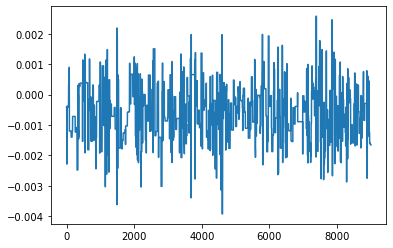

In [11]:
plt.plot(chain[:,1])

In [12]:
acc_rates

array([0.0186, 0.063 , 0.0164, 0.    , 0.    ])

In [13]:
acc_rates_mu

array([0.0026, 0.0018, 0.0019, 0.0011, 0.0021, 0.002 , 0.0012, 0.0019,
       0.0008, 0.0013, 0.0016, 0.0017, 0.0016, 0.0019, 0.001 , 0.0013,
       0.0025, 0.0014, 0.0015, 0.0019, 0.0012, 0.0014, 0.0016, 0.0011,
       0.0014, 0.0017, 0.0019, 0.0021, 0.0025, 0.0017, 0.0017, 0.0021,
       0.0011, 0.0011, 0.002 , 0.001 , 0.0012, 0.0018, 0.0027, 0.0022,
       0.0018, 0.0013, 0.0019, 0.0013, 0.0021, 0.0015, 0.0009, 0.0014,
       0.002 , 0.0014, 0.002 , 0.0025, 0.0022, 0.0016, 0.0021, 0.001 ,
       0.0021, 0.0014, 0.0008, 0.0016, 0.0016, 0.0013, 0.0018, 0.0021,
       0.0023, 0.0015, 0.0014, 0.0019, 0.0018, 0.0008, 0.001 , 0.0015,
       0.0019, 0.0017, 0.0014, 0.0017, 0.0018, 0.002 , 0.0012, 0.0007,
       0.0016, 0.0023, 0.0014, 0.0018, 0.0014, 0.0015, 0.0018, 0.0019,
       0.0022, 0.0015, 0.0021, 0.0017, 0.0019, 0.002 , 0.0017, 0.0014,
       0.0011, 0.0015, 0.0028, 0.0016, 0.0017, 0.002 , 0.0018, 0.0017,
       0.0021, 0.0022, 0.0015, 0.0014, 0.002 , 0.0014, 0.0017, 0.0012,
      

In [14]:
acc_rates_b

array([0.4079, 0.412 , 0.4125, 0.4137, 0.4118, 0.4076, 0.4025, 0.4189,
       0.412 , 0.402 , 0.4175, 0.4131, 0.409 , 0.4037, 0.4128, 0.4168,
       0.406 , 0.4165, 0.4065, 0.4073, 0.3996, 0.4072, 0.3979, 0.4074,
       0.4046, 0.4008, 0.4093, 0.4051, 0.4059, 0.3991, 0.4057, 0.4068,
       0.4006, 0.4038, 0.4132, 0.4142, 0.4123, 0.405 , 0.41  , 0.3993,
       0.411 , 0.4008, 0.4001, 0.3942, 0.4038, 0.4132, 0.417 , 0.4133,
       0.4086, 0.4114, 0.395 , 0.4116, 0.4075, 0.4046, 0.4007, 0.4132,
       0.3992, 0.4077, 0.411 , 0.399 , 0.3995, 0.3914, 0.3945, 0.4052,
       0.4096, 0.4049, 0.4087, 0.4103, 0.4059, 0.3996, 0.3949, 0.3949,
       0.4087, 0.4093, 0.3994, 0.4047, 0.4124, 0.4114, 0.4154, 0.4042,
       0.3909, 0.402 , 0.4191, 0.4038, 0.4091, 0.4159, 0.4044, 0.4127,
       0.3935, 0.4011, 0.4065, 0.411 , 0.4047, 0.4073, 0.399 , 0.4108,
       0.398 , 0.4031, 0.416 , 0.408 , 0.4078, 0.4071, 0.4025, 0.4022,
       0.4175, 0.4104, 0.4011, 0.4046, 0.3968, 0.4092, 0.4048, 0.4098,
      

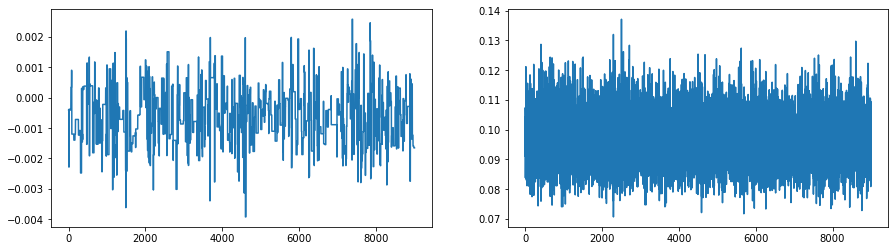

In [28]:
plt.figure(figsize = (15,4))
plt.subplot(1,2,1)
plt.plot(chain[:, 1])
plt.subplot(1,2,2)
plt.plot(chain[:, 3])

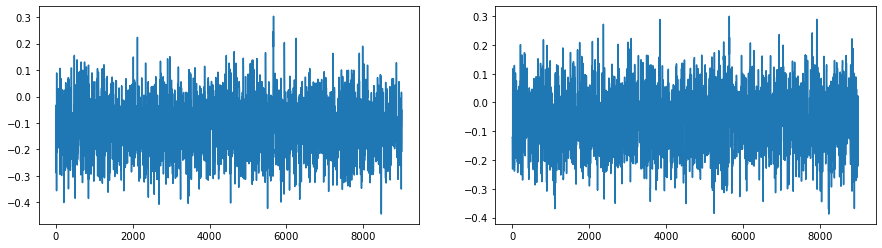

In [31]:
plt.figure(figsize = (15,4))
plt.subplot(1,2,1)
plt.plot(chain_b[:,0])
plt.subplot(1,2,2)
plt.plot(chain_b[:,1])